# Heart Disease Prediction Classification Project

This project builds explores various Python-based Data Science libraries in order to build a Machine Learning Model capable of predicting if a person has a heart disease based on their medical attributes.

## Problem Statement
> Given medical attributes of a patient, can we predict whether or not they have a heart disease?

## Data Information
> Heart Disease Data set published by UCI is used for this project. The dataset was taken from UCI Macine Learning Archives: https://archive.ics.uci.edu/dataset/45/heart+disease
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.

**Data Dictionary:**

Create data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Importing Libraries

In [3]:
# Importing EDA and Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plots will appear inside notebooks
%matplotlib inline 

# Importing Machine Learning Models from SciKit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing Evaluation Libraries
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay

## Load and explore the Dataset

In [5]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Exploratory Data Analysis (EDA)

* Analysing the data and getting familiar with the columns in the dataset.
* Understanding the data types of each column.
* Looking for missing values in the dataset and evaluating solutions to deal with them.
* Looking for Outliers.
* How to get more out of the data


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# Understanding Data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

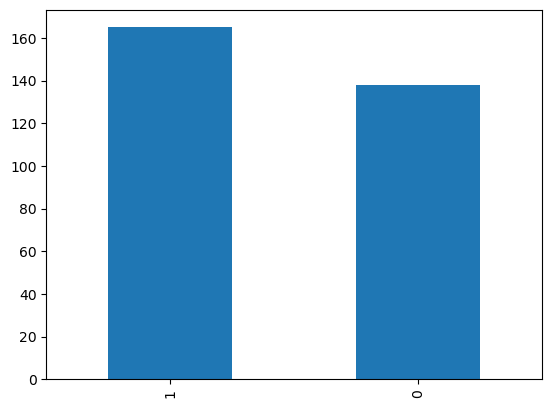

In [13]:
df["target"].value_counts().plot(kind="bar")

In [14]:
# Getting descriptive stats for the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
# Finding Missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency according to Sex

In [18]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [20]:
# Check relation with the target
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

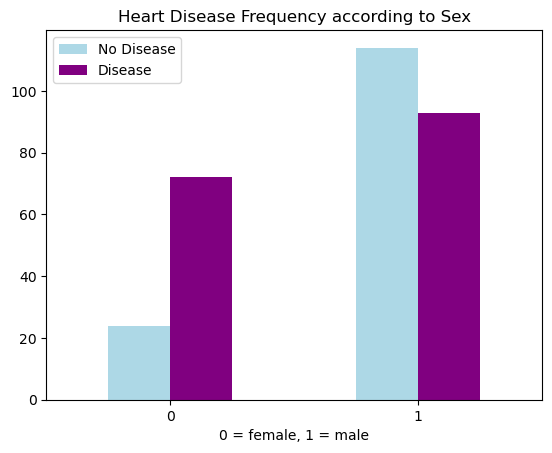

In [46]:
# Plotting the relation
pd.crosstab(df["sex"], df["target"]).plot(kind="bar", color=['lightblue', 'purple'])

# Adding Info
plt.title("Heart Disease Frequency according to Sex")
plt.xlabel("0 = female, 1 = male")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

### Age vs Resting Blood Pressure (trestbps) for Heart Disease

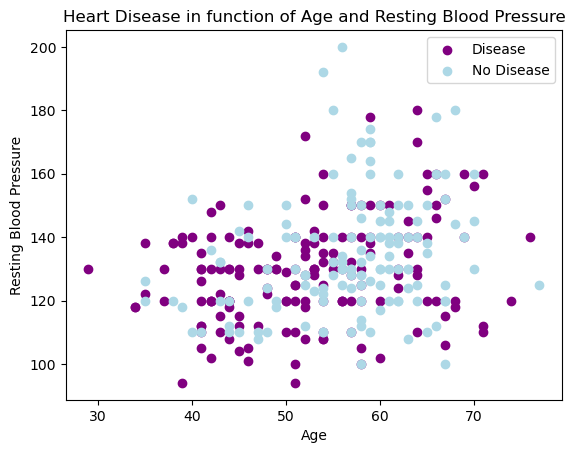

In [49]:
# Create another Plot
plt.figure()

# Scatter with Positive Examples
plt.scatter(df.age[df.target == 1], df.trestbps[df.target == 1], c="purple")

# Scatter with Negative Examples
plt.scatter(df.age[df.target == 0], df.trestbps[df.target == 0], c="lightblue")

# Adding Info
plt.title("Heart Disease in function of Age and Resting Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.legend(["Disease", "No Disease"])

<Axes: ylabel='Frequency'>

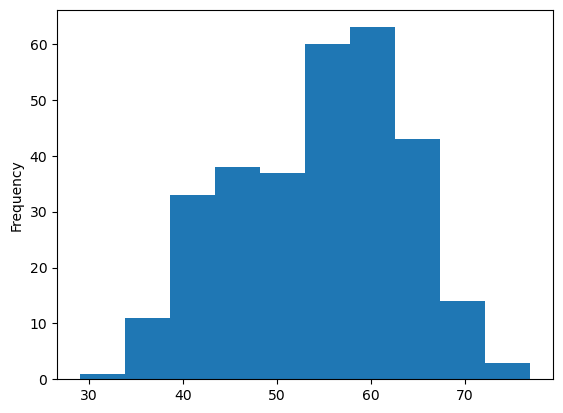

In [50]:
# Check distribution of age
df.age.plot(kind="hist")

### Heart Disease Frequency Per Chest Pain
#### cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [52]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


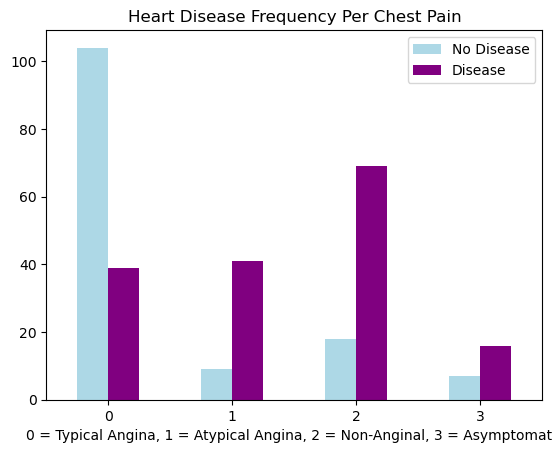

In [57]:
# Plotting the Crosstab
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["lightblue", "purple"])

# Additional Info
plt.title("Heart Disease Frequency Per Chest Pain")
plt.xlabel("0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal, 3 = Asymptomatic")
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])

### Making a Correlation Matrix

In [60]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


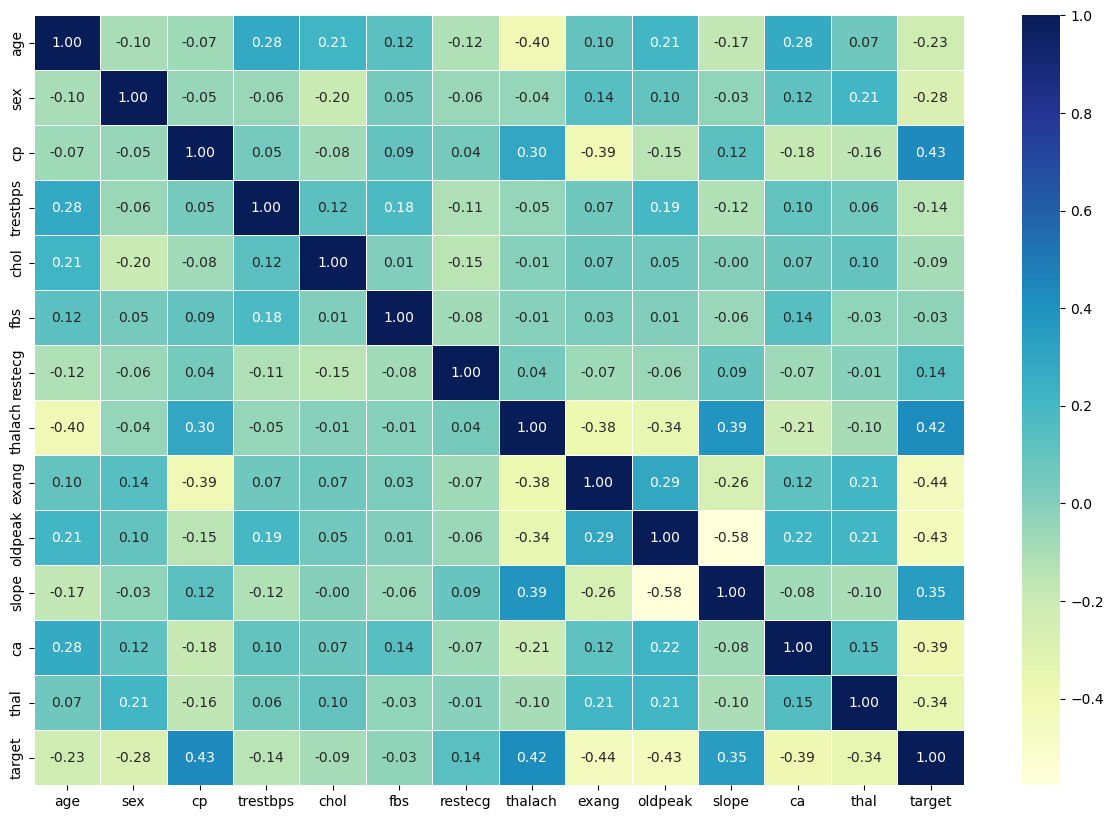

In [66]:
# Plotting the Correlation Matrix for better visualisation
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt="0.2f", cmap="YlGnBu")

## Modelling

In [67]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Separating Features and Labels from the Dataset 

In [68]:
X = df.drop("target", axis = 1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [79]:
y = df.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Splitting data into Train and Test Sets

In [80]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [84]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [85]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

### Choosing a Machine Learning Model
#### As this project is a binary classification problem, i.e the data can have only 2 outputs -> if the patient has heart disease or no, we will be using and comparing results from 3 machine learning models to predict our results.
#### Models used:
1. Logistic Regression
2. K Nearest Neighbors (KNN)
3. Random Forest Classification

In [92]:
# Putting instances of the Models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(), 
    "KNN": KNeighborsClassifier(), 
    "Random Forest": RandomForestClassifier()
}

# Function to Fit and Score the Model Performance
def fit_score(models, X_train, X_test, y_train, y_test):
    """
        Fits and Evaluates machine Learning Models
        models: dictionary of machine learning models from SciKit learn
        X_train: set of training features (no labels)
        X_test: set of test features (no labels)
        y_train: training labels
        y_test: test labels
    """
    # Set Random seed
    np.random.seed(42)
    
    # Dictionary to keep track of model scores
    model_scores = {}
    
    # Loop through all the models to fit and evaluate performance
    for name, model in models.items():
        # Fit model to the Training data
        model.fit(X_train, y_train)
        
        # Calculate accuracy using score function and storing result in dictionary
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [93]:
# Testing out the models using fit_score() function
model_scores = fit_score(models, X_train, X_test, y_train, y_test)

model_scores

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

<Axes: >

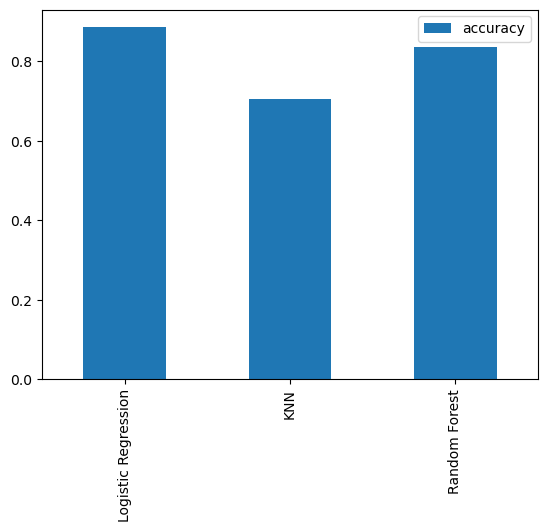

In [91]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.T.plot.bar()

It can be inferred from the plot that KNN has the lowest accuracy amongst the 3.
We can try to tune the hyperparameters for KNN model to see if it provides better results for any other value of number of neighbors
### Hyperparameter Tuning for KNN

In [100]:
# Tuning KNN Model

# Creating empty lists to store scores
train_scores = []
test_scores = []

# Taking a range from 1 to 20 to set neighbors in knn -> default is 5
neighbors = range(1,21)

# Looping through the neighbors and fitting and evaluating the model
for neighbor in neighbors:
    # Creating KNN instance
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [95]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [96]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

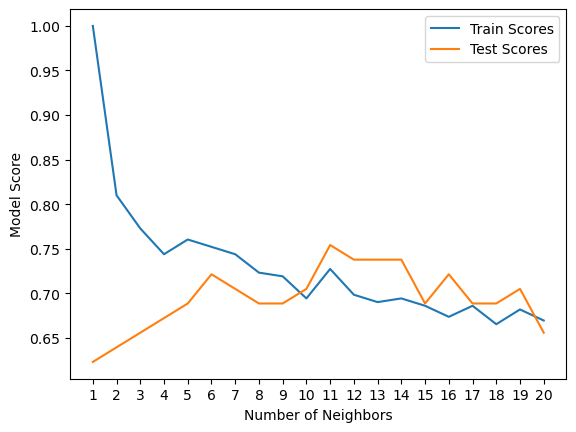

In [99]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.xticks(np.arange(1, 21, 1))
plt.legend()

Looking at the plot above, we can see that trying different values of neighbors did not improve the performance, and out KNN model is still inferior to the other 2 models.
Hence, we can discard this model and try to find the better model by tuning hyoerparameters for the remaining 2 models, i.e Logistic Regression and Random Forest Classification 

### Hyperparameter Tuning for Logitic Regression and Random Forest Classification with RandomizedSearchCV

In [101]:
# Creating hyperparameter grid for Logistic Regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

# Creating hyperparamer grid for Random Forest Classification
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [109]:
# Tuning Logistic Regression

np.random.seed(42)

# Setting random hyperparameter search
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(), 
    param_distributions=log_reg_grid, 
    cv=5, 
    n_iter=20, 
    verbose=True
)

# Fitting the model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [105]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [106]:
# Checking Best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [113]:
# Tuning Random Forest Classification

np.random.seed(42)

# Setting random hyperparameter search
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [114]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [115]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

After Looking at the results, we still see that Logistic Regression performs better tha a Random Forest with Randomized hyperparameters.
Finally, we can use GridSearchCV for Logistic Regressionthat performs an exhaustive search of all the possible combinations of hyperparameters, just to confirm its accuracy.

### Hyperparameter Tuning for Logitic Regression with GridSearchCV

In [121]:
np.random.seed(42)

# Setting up GridSearchCV
gs_log_reg = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True
)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [122]:
# Checking Accuracy scores
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [123]:
# Best Parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

## Model Evaluation

Logistic Regression has so far proven to be the best fit for the dataset.
Now it's time to evaluate the model with different accuracy measures.

#### Techniques Used:
1. Confusion matrix
2. Precision
3. Recall
4. F1 Score
5. Classification Report
6. ROC Curve
7. ROC Area Under the Curve (AUC)

In [125]:
# Predicting Labels for Test Features
y_pred = gs_log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [127]:
y_test.values

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

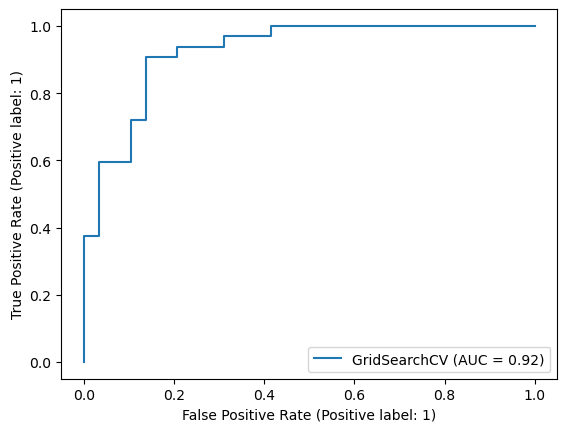

In [131]:
# Plotting the ROC AUC
RocCurveDisplay.from_estimator(estimator=gs_log_reg, X=X_test, y=y_test);

In [133]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 25.722222222222214, 'Predicted Label')

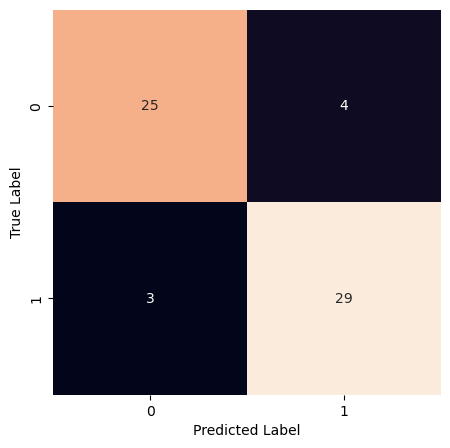

In [137]:
# Visualising Confusion Matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(conf_matrix, annot=True, cbar=False)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")



In [139]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [155]:
# Classification Report using Cross Validation -> cross_val_score()
np.random.seed(42)
# Check Best Parameters
gs_log_reg.best_params_


{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [156]:
# Create a new instance of classifier using best parameters
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")


In [157]:
# Cross-Validated Accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
np.mean(cv_acc)

0.8479781420765027

In [158]:
# Cross-Validated Precision
cv_prec = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_prec)

0.8215873015873015

In [159]:
# Cross-Validated Recall
cv_rec = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_rec)

0.9272727272727274

In [160]:
# Cross-Validated F1 score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.8705403543192143

<Axes: title={'center': 'Cross-Validated Clasification Metrics'}>

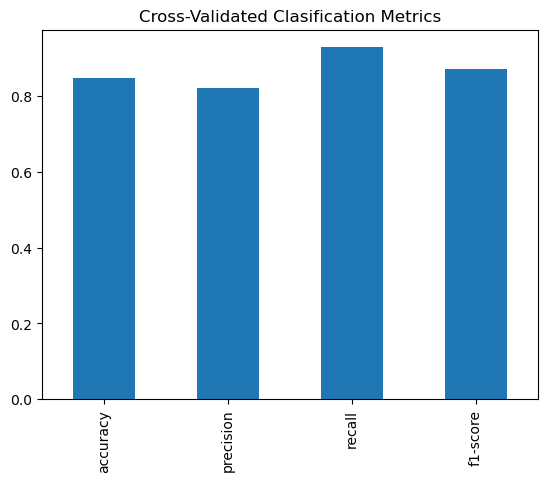

In [162]:
# Visualising Metrics
cv_metrics = pd.DataFrame({
    "accuracy": np.mean(cv_acc),
    "precision": np.mean(cv_prec),
    "recall": np.mean(cv_rec),
    "f1-score": np.mean(cv_f1)
    },
    index=[0]
)

cv_metrics.T.plot.bar(title="Cross-Validated Clasification Metrics", legend=False)